In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import typing

In [2]:
# alphabet of death  useful for mapping the names into something more human readable
code_to_name = {
    'A-R_V-Y': 'Total Deaths',
    'ACC': 'Accidents',
    'A_B': 'Infectious and Parasitic Diseases',
    'C00-D48': 'Neoplasms',
    'D50-D89': 'Diseases of the Blood',
    'E': 'Endocrine, Nutritional and Metabolic Diseases',
    'F': 'Mental and Behavioural Disorders',
    'F10': 'Abuse of Alcohol',
    'G_H': 'Diseases of the Nervous System and the Sense Organs',
    'I': 'Diseases of the Circulatory System',
    'J': 'Diseases of the Respiratory System',
    'K': 'Diseases of the Digestive System',
    'L': 'Diseases of the Skin and Subcutaneous Tissue',
    'M': 'Diseases of the Musculoskeletal System and Connective Tissue',
    'N': 'Diseases of the Genitourinary System',
    'TOXICO': 'Abuse of Drugs',
    'U071': 'COVID-19',
    'V_Y85': 'Transport Accidents',
    'X60-X84_Y870': 'Intentional Self-Harm',
    'X85-Y09_Y871': 'Assault'
}


In [3]:
folder_path = 'DopData/uv/'

dat_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dat')]

# List to store DataFrames
dataframes = []

for file_path in dat_files:
    # Extract country name from filename (modify this based on your actual filename structure)
    country_name = os.path.basename(file_path).replace('.dat', '').split('_')[-1]

    df = pd.read_csv(file_path, 
                     delim_whitespace=True, 
                     comment='#', 
                     header=None,
                     na_values=-1.000,
                     names=['YYYYMMDD', 'UVIEF', 'UVIEFerr', 'UVDEF', 'UVDEFerr', 'UVDEC', 'UVDECerr', 
                            'UVDVF', 'UVDVFerr', 'UVDVC', 'UVDVCerr', 'UVDDF', 'UVDDFerr', 'UVDDC', 'UVDDCerr', 
                            'CMF', 'ozone'])

    # Add country name as a new column
    df['Country'] = country_name

    dataframes.append(df)


In [4]:
dataframes[0]

,YYYYMMDD,UVIEF,UVIEFerr,UVDEF,UVDEFerr,UVDEC,UVDECerr,UVDVF,UVDVFerr,UVDVC,UVDVCerr,UVDDF,UVDDFerr,UVDDC,UVDDCerr,CMF,ozone,Country
0,19600101,0.410,0.041,0.162,0.019,NaN,NaN,0.146,0.043,NaN,NaN,0.031,0.017,NaN,NaN,NaN,287.2,Netherlands
1,19600102,0.443,0.042,0.173,0.020,NaN,NaN,0.168,0.043,NaN,NaN,0.035,0.017,NaN,NaN,NaN,264.3,Netherlands
2,19600103,0.386,0.042,0.154,0.020,NaN,NaN,0.129,0.044,NaN,NaN,0.027,0.017,NaN,NaN,NaN,320.4,Netherlands
3,19600104,0.449,0.043,0.176,0.020,NaN,NaN,0.171,0.044,NaN,NaN,0.036,0.017,NaN,NaN,NaN,267.6,Netherlands
4,19600105,0.435,0.043,0.172,0.020,NaN,NaN,0.160,0.044,NaN,NaN,0.033,0.018,NaN,NaN,NaN,282.8,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,20221227,0.386,0.040,0.153,0.019,NaN,NaN,0.132,0.042,NaN,NaN,0.028,0.017,NaN,NaN,NaN,297.4,Netherlands
23007,20221228,0.394,0.040,0.155,0.019,NaN,NaN,0.137,0.042,NaN,NaN,0.029,0.017,NaN,NaN,NaN,292.0,Netherlands
23008,20221229,0.325,0.041,0.132,0.019,NaN,NaN,0.090,0.042,NaN,NaN,0.019,0.017,NaN,NaN,NaN,392.4,Netherlands
23009,20221230,0.365,0.041,0.146,0.019,NaN,NaN,0.117,0.042,NaN,NaN,0.024,0.017,NaN,NaN,NaN,330.8,Netherlands


In [5]:
#Reading in our Datasets
df_demographic = pd.read_csv("DopData/DemographicData.csv")
df_final1 = pd.read_csv("DopData/df_final1.csv", index_col=[0, 1])
cod_df = pd.read_csv("DopData/df_final2.csv", index_col=[0, 1])
df_final = pd.read_csv("DopData/df_final.csv", index_col=[0, 1])
df_health = pd.read_csv("DopData/df_health.csv")
df_poverty=pd.read_csv("DopData/ilc_mddd11_page_linear.csv",sep=",")
df_iem=pd.read_csv("DopData/ilc_mdes09_page_linear.csv",sep=",")
df_beds=pd.read_csv("DopData/tps00046_page_linear.csv",sep=",")
df_healthcare=pd.read_csv("DopData/hlth_sha11_hf_page_linear.csv",sep=",")

df_beds.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'facility', 'hlthcare', 'OBS_FLAG'],inplace=True)
df_poverty.drop(columns=["DATAFLOW","LAST UPDATE","freq","unit","age","sex","OBS_FLAG"],inplace=True)
df_iem.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'subjnmon', 'hhtyp','incgrp', 'OBS_FLAG'],inplace=True)
df_healthcare.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'icha11_hf', 'OBS_FLAG'],inplace=True)

display(df_healthcare)
#display(cod_df)
#display(df_final.head())
#display(df_health.head())

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2013,10.29
1,AT,2014,10.37
2,AT,2015,10.37
3,AT,2016,10.35
4,AT,2017,10.38
...,...,...,...
347,UK,2015,9.90
348,UK,2016,9.87
349,UK,2017,9.81
350,UK,2018,9.90


In [6]:
df_healthcare.columns

Index(['geo', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')

In [7]:
# some datasets have a different column name for year 
df_health.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year'}, inplace=True)
df_poverty.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year',"OBS_VALUE":"deprivation rate"}, inplace=True)
df_iem.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year',"OBS_VALUE":"inabillity to make ends meet %"}, inplace=True)
df_beds.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year',"OBS_VALUE":"hospitalbeds per 100k pop"}, inplace=True)
df_healthcare.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year',"OBS_VALUE":"healthcare expend. % of GDPF"}, inplace=True) 

In [10]:
# Here I deal with the multi index and year to prepare for the merge
cod_df_reset = cod_df.reset_index()
cod_df_reset = cod_df_reset.drop(index=0)
cod_df_reset.rename(columns={'causes of death': 'year', 'level_1': 'country'}, inplace=True)
cod_df_reset.rename(columns={'geo': 'country', 'TIME_PERIOD': 'year'}, inplace=True)
cod_df_reset['year'] = cod_df_reset['year'].astype(int)

# merging on country and year
data = pd.merge(df_demographic, cod_df_reset, on=['country', 'year'])
data=pd.merge(df_poverty,data, on=['country', 'year'])
data=pd.merge(df_iem,data, on=['country', 'year'])
data=pd.merge(df_beds,data, on=['country', 'year'])
data=pd.merge(df_healthcare,data, on=['country', 'year'])

# here NA columsn ar edropped but maybe we should replace them with the mean as flo mentioend
print(f"Number of NA rows {data.isna().any(axis=1).sum()}")
data = data.dropna()
 
display(data)
causes_of_death=cod_df_reset.columns.to_numpy()[2:]

Number of NA rows 2


,country,year,healthcare expend. % of GDPF,hospitalbeds per 100k pop,inabillity to make ends meet %,deprivation rate,Unnamed: 0,total population,Immigrants - emigrants,median age,...,J,K,L,M,N,TOXICO,U071,V_Y85,X60-X84_Y870,X85-Y09_Y871
0,AT,2013,10.29,764.46,5.4,4.2,685,8479823.0,56122.0,42.6,...,50.55,37.08,0.76,3.27,18.44,2.25,0.00,5.88,15.35,0.44
1,AT,2014,10.37,758.39,5.6,4.0,721,8546356.0,73670.0,42.9,...,46.63,33.29,0.66,3.06,18.56,1.55,0.00,5.76,15.25,0.43
2,AT,2015,10.37,753.68,5.3,3.6,757,8642699.0,114237.0,43.0,...,54.50,33.93,0.66,3.20,20.93,1.41,0.00,5.85,14.45,0.57
3,AT,2016,10.35,742.14,4.3,3.0,793,8736668.0,65388.0,43.0,...,51.83,33.51,0.93,3.77,20.83,1.13,0.00,5.32,13.63,0.50
4,AT,2017,10.38,736.62,4.5,3.7,829,8797566.0,45039.0,43.0,...,62.32,33.36,0.92,3.82,21.60,1.06,0.00,5.18,13.84,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,SK,2016,6.97,578.40,10.1,8.2,825,5430798.0,3885.0,39.4,...,78.64,67.58,5.21,1.86,23.47,0.00,0.00,7.17,7.48,0.74
237,SK,2017,6.76,582.05,8.1,7.0,861,5439232.0,3722.0,39.8,...,94.59,66.62,3.87,1.72,26.31,0.09,0.00,7.48,7.23,0.48
238,SK,2018,6.67,569.62,8.4,7.0,897,5446771.0,3955.0,40.2,...,86.96,71.65,5.25,1.96,25.90,0.06,0.00,7.15,7.94,0.58
239,SK,2019,6.92,576.11,9.4,7.9,933,5454147.0,3632.0,40.6,...,78.57,65.18,5.44,1.36,21.64,0.07,0.00,8.16,6.97,0.58


In [11]:
demographic_factors=list(data.columns[2:-20])
print(demographic_factors)

['healthcare expend. % of GDPF', 'hospitalbeds per 100k pop', 'inabillity to make ends meet %', 'deprivation rate', 'Unnamed: 0', 'total population', 'Immigrants - emigrants', 'median age', 'over 80', 'over 60']


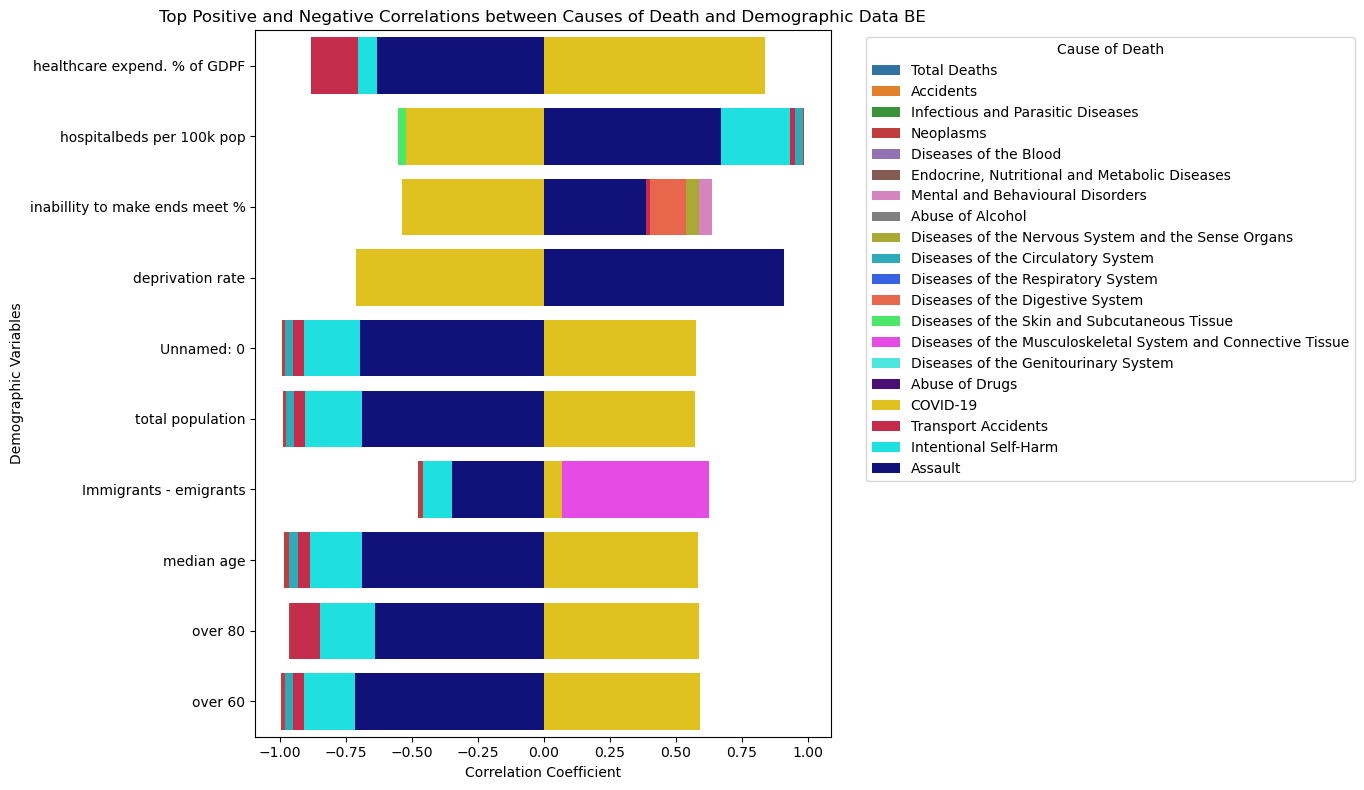

                                    year  healthcare expend. % of GDPF  \
year                            1.000000                      0.846086   
healthcare expend. % of GDPF    0.846086                      1.000000   
hospitalbeds per 100k pop      -0.992260                     -0.794585   
inabillity to make ends meet % -0.233854                     -0.380011   
deprivation rate               -0.797234                     -0.703691   
Unnamed: 0                      1.000000                      0.846086   
total population                0.999327                      0.847427   
Immigrants - emigrants          0.455828                      0.352773   
median age                      0.984113                      0.853313   
over 80                         0.980196                      0.876810   
over 60                         0.999200                      0.852044   
A-R_V-Y                        -0.221470                      0.257457   
ACC                            -0.8319

In [13]:

# return corr matrix 
def get_country_corr(dataframe, country):
    country_data = dataframe[dataframe["country"] == country]
    return country_data.corr(numeric_only=True)

 

country_name = "BE"
corr = get_country_corr(data, country_name)

relevant_correlations = corr.loc[demographic_factors, causes_of_death]

flat_relevant_correlations = relevant_correlations.unstack().reset_index()
flat_relevant_correlations.columns = ['CauseOfDeath', 'DemographicVariable', 'Correlation']
flat_relevant_correlations.dropna(inplace=True)


flat_relevant_correlations['CauseOfDeath'] = flat_relevant_correlations['CauseOfDeath'].map(code_to_name)
sorted_relevant_correlations = flat_relevant_correlations.copy()
sorted_relevant_correlations['AbsCorrelation'] = sorted_relevant_correlations['Correlation'].abs()
# custom color codes so its clearer for the eye I asked GPT to generate those so if you add more columns just add some colors for them
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1a55FF', '#FF5733', '#33FF57', '#FF33FB', '#33FFF6',
                  '#4B0082', '#FFD700', '#DC143C', '#00FFFF', '#00008B']



plt.figure(figsize=(14,8))
sns.barplot(x='Correlation', y='DemographicVariable', data=sorted_relevant_correlations,
            hue='CauseOfDeath', dodge=False, palette=custom_palette)

plt.title('Top Positive and Negative Correlations between Causes of Death and Demographic Data ' + country_name)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Demographic Variables')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
print(corr)
